# **Menyiapkan data**

1. Mengimport modul pandas untuk memanipulasi dan analisis pada data. Dan modul numpy, untuk komputasi numerik.

In [1]:
#import modul
import pandas as pd
import numpy as np

2. Masukan dataset yang akan diproses (hasil dari labelin sentimen sebelumnya)

In [2]:
#panggil data
df = pd.read_csv('labelin_sentimen-nu-1.csv')
df.head()

,full_text,id_str,created_at,username,user_id_str,lang,location,quote_count,reply_count,retweet_count,...,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence,polarity,sentimen
0,@tempodotco Dibayar brp tuh @nahdlatululama Am...,1.770000e+32,2024-04-01 00:42:32+00:00,SManikmoyo,1.240000e+32,in,Russia,0,0,0,...,Dibayar brp tuh Ama 02?,Dibayar brp tuh Ama,dibayar brp tuh ama,"['dibayar', 'brp', 'tuh', 'ama']","['dibayar', 'berapa', 'tuh', 'sama']",['dibayar'],['bayar'],bayar,0.000000,Netral
1,@ZoelHayat Makanya di Indonesia ini mayoritas ...,1.770000e+29,2024-04-01 00:54:53+00:00,Anti_Bajingan,1.922291e+09,in,"Trenggalek, Indonesia",0,0,0,...,Makanya di Indonesia ini mayoritas ummat isla...,Makanya Indonesia ini mayoritas ummat islam s...,makanya indonesia ini mayoritas ummat islam s...,"['makanya', 'indonesia', 'ini', 'mayoritas', '...","['makanya', 'indonesia', 'ini', 'mayoritas', '...","['indonesia', 'mayoritas', 'ummat', 'islam', '...","['indonesia', 'mayoritas', 'ummat', 'islam', '...",indonesia mayoritas ummat islam simpang ajar i...,-0.283333,Negatif
2,@tants_dj @evylagi Ustad2 nu yg bener2 luas ha...,1.770000e+31,2024-04-01 01:19:07+00:00,xinyuthingker,1.330000e+47,in,Mixxtopia,0,1,0,...,Ustad2 nu yg bener2 luas hatinya ya buya yah...,Ustad bener luas hatinya buya yahya ustad som...,ustad bener luas hatinya buya yahya ustad som...,"['ustad', 'bener', 'luas', 'hatinya', 'buya', ...","['ustad', 'benar', 'luas', 'hatinya', 'buya', ...","['ustad', 'luas', 'hatinya', 'buya', 'yahya', ...","['ustad', 'luas', 'hati', 'buya', 'yahya', 'us...",ustad luas hati buya yahya ustad somad main us...,-0.051042,Negatif
3,@geloraco Bukti bhwa @nahdlatululama tidak iku...,1.770000e+32,2024-04-01 03:37:26+00:00,Toto_1945,9.820000e+46,in,Indonesia,0,1,0,...,Bukti bhwa tidak ikut politik praktik terban...,Bukti bhwa tidak ikut politik praktik terbant...,bukti bhwa tidak ikut politik praktik terbant...,"['bukti', 'bhwa', 'tidak', 'ikut', 'politik', ...","['bukti', 'bahwa', 'tidak', 'ikut', 'politik',...","['bukti', 'politik', 'praktik', 'terbantahkan'...","['bukti', 'politik', 'praktik', 'bantah', 'sek...",bukti politik praktik bantah sekjen kemarin bi...,0.025000,Positif
4,@Toto_1945 @geloraco @nahdlatululama @GusIpul_...,1.770000e+32,2024-04-01 04:05:05+00:00,FashionIin,1.520000e+32,in,NaN,0,0,0,...,Santai aja.. Klu gak mengakui Gak mengucap...,Santai aja Klu gak mengakui Gak mengucap GAK ...,santai aja klu gak mengakui gak mengucap gak ...,"['santai', 'aja', 'klu', 'gak', 'mengakui', 'g...","['santai', 'saja', 'kalau', 'enggak', 'mengaku...","['santai', 'mengakui', 'mengucap', 'dideportasi']","['santai', 'aku', 'ucap', 'deportasi']",santai aku ucap deportasi,0.000000,Netral


3. Melihat banyak sentimen, dan jumlah keseluruhan data.

In [3]:
#melihat banyak sentimen pada kolom Label
df['sentimen'].value_counts()

sentimen
Netral     1548
Positif    1055
Negatif     506
Name: count, dtype: int64

In [4]:
#jumlah keseluruhan data
df.shape

(3109, 26)

4. Mengecek missing values. Bertujuan agar saat proses klasifikasi algoritma menghindari kesalahan atau error.

In [5]:
#cek missing value pada setiap kolom nya
missing_values = df.isnull().sum()
missing_values

full_text              0
id_str                 0
created_at             0
username               0
user_id_str            0
lang                   0
location            1114
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
tweet_url              0
mentions            1199
mention_count          0
source                 0
target              1199
remove_user            1
cleaning               1
case_folding           1
tokenisasi             0
normalisasi            0
stopword_removal       0
stemming               0
to_sentence           21
polarity               0
sentimen               0
dtype: int64

jika hasil dari missing value 0, artinya data tidak terdapat missing value. Jika ada missing value maka harus di hilangkan, contohnya disini untuk kolom to_sentence terdapat 21 missing value, maka perlu dihilangkan. noted: disini memacu pada kolom to_sentence karena kolom ini yang akan diproses untuk klasifikasinya.

In [6]:
kolom_missing_values = 'to_sentence'
df.dropna(subset=[kolom_missing_values], inplace=True)

Mengecek missing values lagi.

In [7]:
missing_values = df.isnull().sum()
missing_values

full_text              0
id_str                 0
created_at             0
username               0
user_id_str            0
lang                   0
location            1106
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
tweet_url              0
mentions            1199
mention_count          0
source                 0
target              1199
remove_user            0
cleaning               0
case_folding           0
tokenisasi             0
normalisasi            0
stopword_removal       0
stemming               0
to_sentence            0
polarity               0
sentimen               0
dtype: int64

mengecek banyak datanya kembali. jika menghapus missing values akan terjadi pengurangan data sesuai dengan banyaknya missing values.

In [8]:
df.shape

(3088, 26)

ini jumlah hasil akhir data yang diproses selanjutnya. kemudian kita simpan hasil akhir ini untuk diproses lagi ditahap klasifikasi algoritmanya.

In [9]:
df.to_csv('data_klasifikasi_svm.csv', sep=',', index=False)

# **Pemodelan TF-IDF**

Tahap ini bertujuan untuk melihat bobot nilai dari setiap kata nya dengan menggunakan pemodelan TF-IDF. Untuk data teks yang dipakai yakni dari kolom to_sentence yang mana merupakan hasil akhir dari preprocessing data.
Data teks pada kolom to_sentence terlebih dahulu dibuat menjadi bentuk list dengan word_tokenized, atau maksudnya diubah kembali dalam bentuk seperti tokenized, yang bertujuan untuk memisahkan kata per kata untuk memberikan nilai bobotnya.

sebelumnya masukan kembali data yang sudah disimpan tadi, yang sudah melalui tahapan penghapusan missing values.

In [10]:
df = pd.read_csv('data_klasifikasi_svm.csv')
df

,full_text,id_str,created_at,username,user_id_str,lang,location,quote_count,reply_count,retweet_count,...,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence,polarity,sentimen
0,@tempodotco Dibayar brp tuh @nahdlatululama Am...,1.770000e+32,2024-04-01 00:42:32+00:00,SManikmoyo,1.240000e+32,in,Russia,0,0,0,...,Dibayar brp tuh Ama 02?,Dibayar brp tuh Ama,dibayar brp tuh ama,"['dibayar', 'brp', 'tuh', 'ama']","['dibayar', 'berapa', 'tuh', 'sama']",['dibayar'],['bayar'],bayar,0.000000,Netral
1,@ZoelHayat Makanya di Indonesia ini mayoritas ...,1.770000e+29,2024-04-01 00:54:53+00:00,Anti_Bajingan,1.922291e+09,in,"Trenggalek, Indonesia",0,0,0,...,Makanya di Indonesia ini mayoritas ummat isla...,Makanya Indonesia ini mayoritas ummat islam s...,makanya indonesia ini mayoritas ummat islam s...,"['makanya', 'indonesia', 'ini', 'mayoritas', '...","['makanya', 'indonesia', 'ini', 'mayoritas', '...","['indonesia', 'mayoritas', 'ummat', 'islam', '...","['indonesia', 'mayoritas', 'ummat', 'islam', '...",indonesia mayoritas ummat islam simpang ajar i...,-0.283333,Negatif
2,@tants_dj @evylagi Ustad2 nu yg bener2 luas ha...,1.770000e+31,2024-04-01 01:19:07+00:00,xinyuthingker,1.330000e+47,in,Mixxtopia,0,1,0,...,Ustad2 nu yg bener2 luas hatinya ya buya yah...,Ustad bener luas hatinya buya yahya ustad som...,ustad bener luas hatinya buya yahya ustad som...,"['ustad', 'bener', 'luas', 'hatinya', 'buya', ...","['ustad', 'benar', 'luas', 'hatinya', 'buya', ...","['ustad', 'luas', 'hatinya', 'buya', 'yahya', ...","['ustad', 'luas', 'hati', 'buya', 'yahya', 'us...",ustad luas hati buya yahya ustad somad main us...,-0.051042,Negatif
3,@geloraco Bukti bhwa @nahdlatululama tidak iku...,1.770000e+32,2024-04-01 03:37:26+00:00,Toto_1945,9.820000e+46,in,Indonesia,0,1,0,...,Bukti bhwa tidak ikut politik praktik terban...,Bukti bhwa tidak ikut politik praktik terbant...,bukti bhwa tidak ikut politik praktik terbant...,"['bukti', 'bhwa', 'tidak', 'ikut', 'politik', ...","['bukti', 'bahwa', 'tidak', 'ikut', 'politik',...","['bukti', 'politik', 'praktik', 'terbantahkan'...","['bukti', 'politik', 'praktik', 'bantah', 'sek...",bukti politik praktik bantah sekjen kemarin bi...,0.025000,Positif
4,@Toto_1945 @geloraco @nahdlatululama @GusIpul_...,1.770000e+32,2024-04-01 04:05:05+00:00,FashionIin,1.520000e+32,in,NaN,0,0,0,...,Santai aja.. Klu gak mengakui Gak mengucap...,Santai aja Klu gak mengakui Gak mengucap GAK ...,santai aja klu gak mengakui gak mengucap gak ...,"['santai', 'aja', 'klu', 'gak', 'mengakui', 'g...","['santai', 'saja', 'kalau', 'enggak', 'mengaku...","['santai', 'mengakui', 'mengucap', 'dideportasi']","['santai', 'aku', 'ucap', 'deportasi']",santai aku ucap deportasi,0.000000,Netral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,Sepertinya @nahdlatululama atau PBNU sudah lay...,1.810000e+32,2024-07-16 16:16:14+00:00,vanc1Bozz,1.620000e+32,in,NaN,10,77,102,...,Sepertinya atau PBNU sudah layak utk dibubark...,Sepertinya atau PBNU sudah layak utk dibubarka...,sepertinya atau pbnu sudah layak utk dibubarka...,"['sepertinya', 'atau', 'pbnu', 'sudah', 'layak...","['sepertinya', 'atau', 'pbnu', 'sudah', 'layak...","['pbnu', 'layak', 'dibubarkan', 'melanggar', '...","['pbnu', 'layak', 'bubar', 'langgar', 'uud', '...",pbnu layak bubar langgar uud tambah indonesia ...,0.000000,Netral
3084,Malam Yati mpls Onad doggy on sosmed semangka ...,1.810000e+31,2024-07-16 16:45:39+00:00,gwizselle,1.790000e+47,in,NaN,0,36,13,...,Malam Yati mpls Onad doggy on sosmed semangka ...,Malam Yati mpls Onad doggy sosmed semangka Las...,malam yati mpls onad doggy sosmed semangka las...,"['malam', 'yati', 'mpls', 'onad', 'doggy', 'so...","['malam', 'yati', 'mpls', 'onad', 'doggy', 'so...","['malam', 'yati', 'mpls', 'onad', 'doggy', 'so...","['malam', 'yati', 'mpls', 'onad', 'doggy', 'so...",malam yati mpls onad doggy sosmed semangka las...,0.033333,Positif
3085,PERDANA FATAYAT NU BERDIRI DI ARAB 

1. Melakukan proses tokenized kembali untuk dataset, dengan word_tokenized pada library nltk. Ini merupakan proses penting ketika melakukan pembobotan pada kata di kolom to_sentence.

In [11]:
#Buat data yang dibobotkan atau disini menggunakan data dari kolom to_sentence untuk dijadikan pemodelan tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_with_quotes(text):
    tokens = word_tokenize(text)
    tokens_with_quotes = ['"' + token + '"' for token in tokens]
    return tokens_with_quotes

# Menerapkan tokenisasi pada kolom 'untokenized'
df['tokenized_to_sentence'] = df['to_sentence'].apply(lambda x: tokenize_with_quotes(x))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,full_text,id_str,created_at,username,user_id_str,lang,location,quote_count,reply_count,retweet_count,...,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence,polarity,sentimen,tokenized_to_sentence
0,@tempodotco Dibayar brp tuh @nahdlatululama Am...,1.770000e+32,2024-04-01 00:42:32+00:00,SManikmoyo,1.240000e+32,in,Russia,0,0,0,...,Dibayar brp tuh Ama,dibayar brp tuh ama,"['dibayar', 'brp', 'tuh', 'ama']","['dibayar', 'berapa', 'tuh', 'sama']",['dibayar'],['bayar'],bayar,0.000000,Netral,"[""bayar""]"
1,@ZoelHayat Makanya di Indonesia ini mayoritas ...,1.770000e+29,2024-04-01 00:54:53+00:00,Anti_Bajingan,1.922291e+09,in,"Trenggalek, Indonesia",0,0,0,...,Makanya Indonesia ini mayoritas ummat islam s...,makanya indonesia ini mayoritas ummat islam s...,"['makanya', 'indonesia', 'ini', 'mayoritas', '...","['makanya', 'indonesia', 'ini', 'mayoritas', '...","['indonesia', 'mayoritas', 'ummat', 'islam', '...","['indonesia', 'mayoritas', 'ummat', 'islam', '...",indonesia mayoritas ummat islam simpang ajar i...,-0.283333,Negatif,"[""indonesia"", ""mayoritas"", ""ummat"", ""islam"", ""..."
2,@tants_dj @evylagi Ustad2 nu yg bener2 luas ha...,1.770000e+31,2024-04-01 01:19:07+00:00,xinyuthingker,1.330000e+47,in,Mixxtopia,0,1,0,...,Ustad bener luas hatinya buya yahya ustad som...,ustad bener luas hatinya buya yahya ustad som...,"['ustad', 'bener', 'luas', 'hatinya', 'buya', ...","['ustad', 'benar', 'luas', 'hatinya', 'buya', ...","['ustad', 'luas', 'hatinya', 'buya', 'yahya', ...","['ustad', 'luas', 'hati', 'buya', 'yahya', 'us...",ustad luas hati buya yahya ustad somad main us...,-0.051042,Negatif,"[""ustad"", ""luas"", ""hati"", ""buya"", ""yahya"", ""us..."
3,@geloraco Bukti bhwa @nahdlatululama tidak iku...,1.770000e+32,2024-04-01 03:37:26+00:00,Toto_1945,9.820000e+46,in,Indonesia,0,1,0,...,Bukti bhwa tidak ikut politik praktik terbant...,bukti bhwa tidak ikut politik praktik terbant...,"['bukti', 'bhwa', 'tidak', 'ikut', 'politik', ...","['bukti', 'bahwa', 'tidak', 'ikut', 'politik',...","['bukti', 'politik', 'praktik', 'terbantahkan'...","['bukti', 'politik', 'praktik', 'bantah', 'sek...",bukti politik praktik bantah sekjen kemarin bi...,0.025000,Positif,"[""bukti"", ""politik"", ""praktik"", ""bantah"", ""sek..."
4,@Toto_1945 @geloraco @nahdlatululama @GusIpul_...,1.770000e+32,2024-04-01 04:05:05+00:00,FashionIin,1.520000e+32,in,NaN,0,0,0,...,Santai aja Klu gak mengakui Gak mengucap GAK ...,santai aja klu gak mengakui gak mengucap gak ...,"['santai', 'aja', 'klu', 'gak', 'mengakui', 'g...","['santai', 'saja', 'kalau', 'enggak', 'mengaku...","['santai', 'mengakui', 'mengucap', 'dideportasi']","['santai', 'aku', 'ucap', 'deportasi']",santai aku ucap deportasi,0.000000,Netral,"[""santai"", ""aku"", ""ucap"", ""deportasi""]"


2. Melakukan perhitungan bobot (Term Frequency, TF) dari setiap kata dalam dataset di kolom to_sentence. Hasilnya tersimpan dalam kolom 'TF_dict'.

In [12]:
#Menghitung bobot pada setiap kata
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df["TF_dict"] = df['tokenized_to_sentence'].apply(calc_TF)

df["TF_dict"].head()

0                                     {'"bayar"': 1.0}
1    {'"indonesia"': 0.05263157894736842, '"mayorit...
2    {'"ustad"': 0.16666666666666666, '"luas"': 0.0...
3    {'"bukti"': 0.06666666666666667, '"politik"': ...
4    {'"santai"': 0.25, '"aku"': 0.25, '"ucap"': 0....
Name: TF_dict, dtype: object

3. Kemudian mengambil hasil perhitungan pada kolom TF_dict atau hasil TF (Term Frequency) tadi dan menyajikannya kedalam bentuk dataframe/tabel agar mudah dibaca.

In [13]:
#CEK HASIL TF

# Mengambil kolom "TF_dict" dari dataframe
tf_dict = df["TF_dict"]

# Membuat list kosong untuk menampung hasil
results = []

# Mengiterasi setiap key dan value dalam tf_dict
for key, value in tf_dict.items():
    results.append({'term': key, 'TF': value})

# Membuat dataframe dari hasil
result_df = pd.DataFrame(results)

# Menampilkan dataframe
result_df

,term,TF
0,0,"{'""bayar""': 1.0}"
1,1,"{'""indonesia""': 0.05263157894736842, '""mayorit..."
2,2,"{'""ustad""': 0.16666666666666666, '""luas""': 0.0..."
3,3,"{'""bukti""': 0.06666666666666667, '""politik""': ..."
4,4,"{'""santai""': 0.25, '""aku""': 0.25, '""ucap""': 0...."
...,...,...
3083,3083,"{'""pbnu""': 0.08333333333333333, '""layak""': 0.0..."
3084,3084,"{'""malam""': 0.1111111111111111, '""yati""': 0.11..."
3085,3085,"{'""perdana""': 0.03225806451612903, '""fatayat""'..."
3086,3086,"{'""parah""': 0.3333333333333333, '""ketua""': 0.3..."


4. Kemudian menghitung DF (Document Frequency) dan menyajikannya kedalam dataframe/tabel agar mudah dibaca.

In [14]:
#CEK DF

# Menghitung DF
def calc_DF(tfDict):
    count_DF = {}
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df["TF_dict"])

# Membuat list kosong untuk menampung hasil
results = []

# Mengiterasi setiap term dan DF dalam DF
for term, doc_freq in DF.items():
    results.append({'term': term, 'DF': doc_freq})

# Membuat dataframe dari hasil
result_df = pd.DataFrame(results)

# Menampilkan dataframe
result_df

,term,DF
0,"""bayar""",13
1,"""indonesia""",232
2,"""mayoritas""",20
3,"""ummat""",11
4,"""islam""",180
...,...,...
8131,"""nuonlinenews""",1
8132,"""auliyatul""",1
8133,"""ngo""",1
8134,"""advokat""",1


5. Terakhir, menghitung bobot Term Frequency-Inverse Document Frequency (TF-IDF) untuk setiap kata dalam dataset dikolom Tweet. Dan hasilnya akan ditampilkan dalam dataframe bersama dengan kolom hasil TF tadi.

In [15]:
#CEK TF-IDF

# code untuk menghitung IDF
def calc_IDF(n_document, DF):
    IDF_Dict = {}
    for term in DF:
        IDF_Dict[term] = np.log(n_document / (DF[term] + 1))
    return IDF_Dict

# Hitung IDF
IDF = calc_IDF(len(df), DF)

# code untuk menghitung TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

# Set perhitungan TF-IDF untuk membuat kolom "TF-IDF_dict"
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

results = []

for key, value in df["TF-IDF_dict"].items():
    row = {"term": key, "TF-IDF": value}
    results.append(row)

# buat hasil dalam dataframe
result_df = pd.DataFrame(results)

# masukan hasil TF ke dataframe
result_df["TF"] = result_df["term"].apply(lambda x: df["TF_dict"][x])
result_df = result_df[["term", "TF", "TF-IDF"]]
result_df

,term,TF,TF-IDF
0,0,"{'""bayar""': 1.0}","{'""bayar""': 5.396221581529408}"
1,1,"{'""indonesia""': 0.05263157894736842, '""mayorit...","{'""indonesia""': 0.13601265566205084, '""mayorit..."
2,2,"{'""ustad""': 0.16666666666666666, '""luas""': 0.0...","{'""ustad""': 1.0148947936815589, '""luas""': 0.29..."
3,3,"{'""bukti""': 0.06666666666666667, '""politik""': ...","{'""bukti""': 0.3551485806694971, '""politik""': 0..."
4,4,"{'""santai""': 0.25, '""aku""': 0.25, '""ucap""': 0....","{'""santai""': 1.6064602496776417, '""aku""': 1.11..."
...,...,...,...
3083,3083,"{'""pbnu""': 0.08333333333333333, '""layak""': 0.0...","{'""pbnu""': 0.16180909509162758, '""layak""': 0.4..."
3084,3084,"{'""malam""': 0.1111111111111111, '""yati""': 0.11...","{'""malam""': 0.565648881330914, '""yati""': 0.815..."
3085,3085,"{'""perdana""': 0.03225806451612903, '""fatayat""'...","{'""perdana""': 0.2144833725814444, '""fatayat""':..."
3086,3086,"{'""parah""': 0.3333333333333333, '""ketua""': 0.3...","{'""parah""': 1.9460181112694823, '""ketua""': 0.9..."


6. Simpan hasil TF-IDF kedalam device dengan format csv.

In [16]:
#save hasil tf-idf kedalam device
result_df.to_csv('Hasil-Pemodelan-TF-IDF-nu-1.csv', sep=',', index=False)

# **Klasifikasi SVM - Data Test**

1. Masukan kembali data yang awal sebelum pemodelan tf-idf (yang sudah melewati tahapan missing value)

In [17]:
#masukan data yang sudah disave tadi
df_svm2 = pd.read_csv('data_klasifikasi_svm.csv', encoding = 'utf-8')
df_svm2.head()

,full_text,id_str,created_at,username,user_id_str,lang,location,quote_count,reply_count,retweet_count,...,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence,polarity,sentimen
0,@tempodotco Dibayar brp tuh @nahdlatululama Am...,1.770000e+32,2024-04-01 00:42:32+00:00,SManikmoyo,1.240000e+32,in,Russia,0,0,0,...,Dibayar brp tuh Ama 02?,Dibayar brp tuh Ama,dibayar brp tuh ama,"['dibayar', 'brp', 'tuh', 'ama']","['dibayar', 'berapa', 'tuh', 'sama']",['dibayar'],['bayar'],bayar,0.000000,Netral
1,@ZoelHayat Makanya di Indonesia ini mayoritas ...,1.770000e+29,2024-04-01 00:54:53+00:00,Anti_Bajingan,1.922291e+09,in,"Trenggalek, Indonesia",0,0,0,...,Makanya di Indonesia ini mayoritas ummat isla...,Makanya Indonesia ini mayoritas ummat islam s...,makanya indonesia ini mayoritas ummat islam s...,"['makanya', 'indonesia', 'ini', 'mayoritas', '...","['makanya', 'indonesia', 'ini', 'mayoritas', '...","['indonesia', 'mayoritas', 'ummat', 'islam', '...","['indonesia', 'mayoritas', 'ummat', 'islam', '...",indonesia mayoritas ummat islam simpang ajar i...,-0.283333,Negatif
2,@tants_dj @evylagi Ustad2 nu yg bener2 luas ha...,1.770000e+31,2024-04-01 01:19:07+00:00,xinyuthingker,1.330000e+47,in,Mixxtopia,0,1,0,...,Ustad2 nu yg bener2 luas hatinya ya buya yah...,Ustad bener luas hatinya buya yahya ustad som...,ustad bener luas hatinya buya yahya ustad som...,"['ustad', 'bener', 'luas', 'hatinya', 'buya', ...","['ustad', 'benar', 'luas', 'hatinya', 'buya', ...","['ustad', 'luas', 'hatinya', 'buya', 'yahya', ...","['ustad', 'luas', 'hati', 'buya', 'yahya', 'us...",ustad luas hati buya yahya ustad somad main us...,-0.051042,Negatif
3,@geloraco Bukti bhwa @nahdlatululama tidak iku...,1.770000e+32,2024-04-01 03:37:26+00:00,Toto_1945,9.820000e+46,in,Indonesia,0,1,0,...,Bukti bhwa tidak ikut politik praktik terban...,Bukti bhwa tidak ikut politik praktik terbant...,bukti bhwa tidak ikut politik praktik terbant...,"['bukti', 'bhwa', 'tidak', 'ikut', 'politik', ...","['bukti', 'bahwa', 'tidak', 'ikut', 'politik',...","['bukti', 'politik', 'praktik', 'terbantahkan'...","['bukti', 'politik', 'praktik', 'bantah', 'sek...",bukti politik praktik bantah sekjen kemarin bi...,0.025000,Positif
4,@Toto_1945 @geloraco @nahdlatululama @GusIpul_...,1.770000e+32,2024-04-01 04:05:05+00:00,FashionIin,1.520000e+32,in,NaN,0,0,0,...,Santai aja.. Klu gak mengakui Gak mengucap...,Santai aja Klu gak mengakui Gak mengucap GAK ...,santai aja klu gak mengakui gak mengucap gak ...,"['santai', 'aja', 'klu', 'gak', 'mengakui', 'g...","['santai', 'saja', 'kalau', 'enggak', 'mengaku...","['santai', 'mengakui', 'mengucap', 'dideportasi']","['santai', 'aku', 'ucap', 'deportasi']",santai aku ucap deportasi,0.000000,Netral


2. Mengatur Sumbu nilai X dan Y. Disini untuk Sumbu nilai X adalah merupakan kolom berupa teks, yang kolom dari to_sentence. Dan Sumbu Y adalah merupakan label dari sentimen.

In [18]:
#Set sumbu nilai X dan Y
X = df_svm2['to_sentence']
y = df_svm2['sentimen']

**Data perbandingan 20%:80%**

3. Pengujian pertama dilakukan dengan perbandian 20% untuk data test dan 80% untuk data train. Dilakukan spliting data dengan menggunakan train_test_split dari Library sklearn. Dan untuk fungsi code test_size diisi dengan 0.2 jika ingin 20% untuk data testnya, dan fungsi code random_state mohon diisi dengan banyak data 20% dari jumlah keselurahan data. (Cont. Disini nilai 20% datanya 618 data dari jumlah keseluruhan data 3088)

In [19]:
# Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=618) #set random_state sejumlah data 20% dari data keseluruhan

4. Tahapan klasifikasi SVM untuk data test. Sebelum mengklasifikasi data diektrasi terlebih dahulu ke nilai bobot dengan menggunakan TfidfVectorizer. kemudian di klasifikasi menggunakan algoritma SVM dengan kernel linear dari modul SVC, dan juga memakai class balanced agar data yang di proses oleh sistem seimbang untuk setiap sentimennya. Kemudian untuk hasilnya berupa classification report dengan modul dari sklearn juga.

In [20]:
#KLASIFIKASI SVM

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Klasifikasi SVM dengan Linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

# Prediksi sentimen pada data test dengan SVM
y_pred_svm = svm.predict(X_test_tfidf)

# Lihat clasification report
print("Classification Report untuk Data Test:")
print(classification_report(y_test, y_pred_svm))

Classification Report untuk Data Test:
              precision    recall  f1-score   support

     Negatif       0.52      0.28      0.36        94
      Netral       0.65      0.83      0.72       303
     Positif       0.67      0.55      0.60       221

    accuracy                           0.64       618
   macro avg       0.61      0.55      0.56       618
weighted avg       0.63      0.64      0.63       618



5. Melihat nilai akurasi dari klasifikasi untuk data train.


In [21]:
#Lihat Akurasi SVM
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svm)
print("Akurasi Data Test:", accuracy)

Akurasi Data Test: 0.6423948220064725


6. Melihat kembali jumlah data yang di klasifikasi untuk data test.

In [22]:
len(X_test) #jumlah data test yg diuji/test di perbandingan ini

618

7. Melihat hasil prediksi dari klasifikasi SVM.

In [23]:
#Membuat Hasil dataframe dengan melihat hasil label prediksi, nilai sebenarnya, hasil, dan confusion matrix
df_svm2 = pd.DataFrame({"Text": X_test, "Prediksi": y_pred_svm, "Aktual": y_test})
df_svm2["Hasil"] = df_svm2.apply(lambda row: "Benar" if row["Aktual"] == row["Prediksi"] else "Salah", axis=1)

# Menambahkan kolom "Confusion Matrix" berdasarkan kondisi yang diberikan
def calculate_confusion_matrix(row):
    if row["Aktual"] == "Positif" and row["Prediksi"] == "Positif":
        return "True Positive (TP)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Negatif":
        return "True Negative (TN)"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Netral":
        return "True Netral (TNR)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Negatif tapi prediksi Positif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Netral tapi prediksi Positif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Positif tapi prediksi Negatif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Netral tapi prediksi Negatif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Positif tapi prediksi Netral"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Negatif tapi prediksi Netral"
    else:
        return "Unknown"

df_svm2["Confusion Matrix"] = df_svm2.apply(calculate_confusion_matrix, axis=1)
df_svm2

,Text,Prediksi,Aktual,Hasil,Confusion Matrix
259,keluarga lembaga didik nahdlatul ulama selamat...,Positif,Positif,Benar,True Positive (TP)
1878,ciri ciri jilat,Positif,Netral,Salah,False Positif (FP) untuk aktual Netral tapi pr...
2775,orang,Netral,Netral,Benar,True Netral (TNR)
1358,dekat khofifah kaum nahdliyin unggul populasi ...,Positif,Positif,Benar,True Positive (TP)
70,tuju masyarakat tau sikon laku lingkung,Netral,Netral,Benar,True Netral (TNR)
...,...,...,...,...,...
2777,fulcrum commentary and endi aulia garadian nah...,Positif,Negatif,Salah,False Positif (FP) untuk aktual Negatif tapi p...
2731,alhamdulillah nuhun pis pac gera pemuda ansor ...,Netral,Netral,Benar,True Netral (TNR)
664,muslim alir macen alir alir syiah wahabi ikut ...,Netral,Positif,Salah,False Netral (FNR) untuk aktual Positif tapi p...
1374,salah anak bangsa,Negatif,Negatif,Benar,True Negative (TN)


8. Simpan hasil prediksi kedalam device.

In [24]:
#save hasil dataframe diatas
df_svm2.to_csv('hasil_klasifikasi_svm-20%-80%-data-test.csv', sep=',', index=False)

9. Visualisasi Confusion Matrix. Dengan menggunakan modul matplotlib.pyplot untuk memvisualisasikan nya. modul confusion_matrix dari sklearn untuk menghitung confusion matrix. Dan modul seaborn untuk membuat visualisasi heatmap/menampilkan angka-angka pada output confusion matrix.

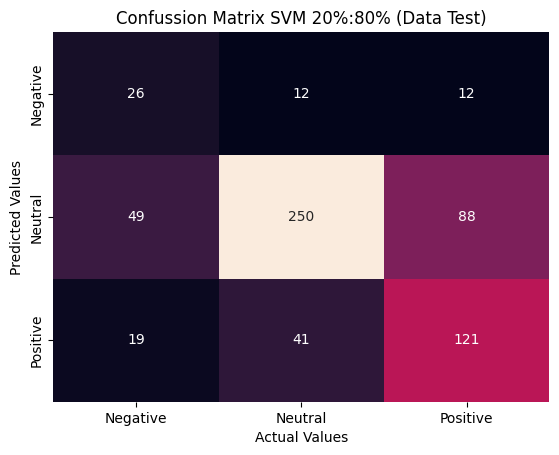

In [25]:
#Visualisasi dari Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False, xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confussion Matrix SVM 20%:80% (Data Test)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Keterangan:

In [26]:
#melihat banyak label confusion matrix
confusion_hasil = df_svm2['Confusion Matrix'].value_counts()
print("Confusion Matrix 3 Kelas:")
print(confusion_hasil)
print()

#melihat prediksi
count_hasil = df_svm2["Hasil"].value_counts()

benar = count_hasil["Benar"] if "Benar" in count_hasil.index else 0
salah = count_hasil["Salah"] if "Salah" in count_hasil.index else 0
print("Prediksi yang benar:", benar, "data")
print("Prediksi yang salah:", salah, "data")
print()

#melihat akurasi, presisi, dan recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#akurasi
acc = accuracy_score(y_test, y_pred_svm)
#tampilkan akurasi
print(f"Akurasi: {acc * 100:.2f}%")
print()

#presisi
average_precision = precision_score(y_test, y_pred_svm, average='weighted')
print(f"Presisi: {average_precision * 100:.2f}%")
print()

#recall
average_recall = recall_score(y_test, y_pred_svm, average='weighted')
print(f"Recall: {average_recall * 100:.2f}%")
print()

#f1-score
f1 = f1_score(y_test, y_pred_svm, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

Confusion Matrix 3 Kelas:
Confusion Matrix
True Netral (TNR)                                                250
True Positive (TP)                                               121
False Netral (FNR) untuk aktual Positif tapi prediksi Netral      88
False Netral (FNR) untuk aktual Negatif tapi prediksi Netral      49
False Positif (FP) untuk aktual Netral tapi prediksi Positif      41
True Negative (TN)                                                26
False Positif (FP) untuk aktual Negatif tapi prediksi Positif     19
False Negatif (FN) untuk aktual Positif tapi prediksi Negatif     12
False Negatif (FN) untuk aktual Netral tapi prediksi Negatif      12
Name: count, dtype: int64

Prediksi yang benar: 397 data
Prediksi yang salah: 221 data

Akurasi: 64.24%

Presisi: 63.49%

Recall: 64.24%

F1 Score: 62.55%


**Data perbandingan 30%:70%**

Untuk perbandingan selanjutnya sama saja. hanya mengganti nilai test size nya pada split train test.

In [27]:
# Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=927) #set random_state sejumlah data 30% dari data keseluruhan

In [28]:
#KLASIFIKASI SVM

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Klasifikasi SVM dengan Linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

# Prediksi sentimen pada data test dengan SVM
y_pred_svm = svm.predict(X_test_tfidf)

# Lihat clasification report
print("Classification Report untuk Data Test:")
print(classification_report(y_test, y_pred_svm))

Classification Report untuk Data Test:
              precision    recall  f1-score   support

     Negatif       0.61      0.12      0.20       163
      Netral       0.61      0.81      0.69       462
     Positif       0.58      0.54      0.56       302

    accuracy                           0.60       927
   macro avg       0.60      0.49      0.49       927
weighted avg       0.60      0.60      0.56       927



In [29]:
#Lihat Akurasi SVM
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svm)
print("Akurasi Data Test:", accuracy)

Akurasi Data Test: 0.5997842502696872


In [30]:
len(X_test) #jumlah data test yg diuji/test di perbandingan ini

927

In [31]:
#Membuat Hasil dataframe dengan melihat hasil label prediksi, nilai sebenarnya, hasil, dan confusion matrix
df_svm2 = pd.DataFrame({"Text": X_test, "Prediksi": y_pred_svm, "Aktual": y_test})
df_svm2["Hasil"] = df_svm2.apply(lambda row: "Benar" if row["Aktual"] == row["Prediksi"] else "Salah", axis=1)

# Menambahkan kolom "Confusion Matrix" berdasarkan kondisi yang diberikan
def calculate_confusion_matrix(row):
    if row["Aktual"] == "Positif" and row["Prediksi"] == "Positif":
        return "True Positive (TP)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Negatif":
        return "True Negative (TN)"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Netral":
        return "True Netral (TNR)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Negatif tapi prediksi Positif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Netral tapi prediksi Positif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Positif tapi prediksi Negatif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Netral tapi prediksi Negatif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Positif tapi prediksi Netral"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Negatif tapi prediksi Netral"
    else:
        return "Unknown"

df_svm2["Confusion Matrix"] = df_svm2.apply(calculate_confusion_matrix, axis=1)
df_svm2

,Text,Prediksi,Aktual,Hasil,Confusion Matrix
455,sabar orang emosi solot saudara keren,Netral,Positif,Salah,False Netral (FNR) untuk aktual Positif tapi p...
620,konteks indonesia ansor organisasi pemuda nahd...,Netral,Netral,Benar,True Netral (TNR)
653,tolak ormas,Netral,Netral,Benar,True Netral (TNR)
1798,siasat rejim pki pecah belah umat ormas islam ...,Positif,Positif,Benar,True Positive (TP)
3044,hei malu,Netral,Negatif,Salah,False Netral (FNR) untuk aktual Negatif tapi p...
...,...,...,...,...,...
1171,kadang kaos kadang jas wkwk,Positif,Positif,Benar,True Positive (TP)
2192,orang benci kedok aktivis lingkung antitesa pe...,Negatif,Negatif,Benar,True Negative (TN)
1336,yaman picis,Netral,Negatif,Salah,False Netral (FNR) untuk aktual Negatif tapi p...
1758,ramai bijak jokowi obral izin izin tambang org...,Positif,Positif,Benar,True Positive (TP)


In [32]:
#save hasil dataframe diatas
df_svm2.to_csv('hasil_klasifikasi_svm-30%-70%-data-test.csv', sep=',', index=False)

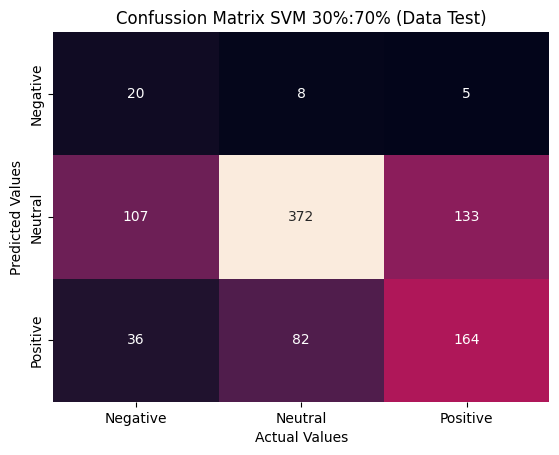

In [33]:
#Visualisasi dari Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False, xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confussion Matrix SVM 30%:70% (Data Test)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Keterangan:

In [34]:
#melihat banyak label confusion matrix
confusion_hasil = df_svm2['Confusion Matrix'].value_counts()
print("Confusion Matrix 3 Kelas:")
print(confusion_hasil)
print()

#melihat prediksi
count_hasil = df_svm2["Hasil"].value_counts()

benar = count_hasil["Benar"] if "Benar" in count_hasil.index else 0
salah = count_hasil["Salah"] if "Salah" in count_hasil.index else 0
print("Prediksi yang benar:", benar, "data")
print("Prediksi yang salah:", salah, "data")
print()

#melihat akurasi, presisi, dan recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#akurasi
acc = accuracy_score(y_test, y_pred_svm)
#tampilkan akurasi
print(f"Akurasi: {acc * 100:.2f}%")
print()

#presisi
average_precision = precision_score(y_test, y_pred_svm, average='weighted')
print(f"Presisi: {average_precision * 100:.2f}%")
print()

#recall
average_recall = recall_score(y_test, y_pred_svm, average='weighted')
print(f"Recall: {average_recall * 100:.2f}%")
print()

#f1-score
f1 = f1_score(y_test, y_pred_svm, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

Confusion Matrix 3 Kelas:
Confusion Matrix
True Netral (TNR)                                                372
True Positive (TP)                                               164
False Netral (FNR) untuk aktual Positif tapi prediksi Netral     133
False Netral (FNR) untuk aktual Negatif tapi prediksi Netral     107
False Positif (FP) untuk aktual Netral tapi prediksi Positif      82
False Positif (FP) untuk aktual Negatif tapi prediksi Positif     36
True Negative (TN)                                                20
False Negatif (FN) untuk aktual Netral tapi prediksi Negatif       8
False Negatif (FN) untuk aktual Positif tapi prediksi Negatif      5
Name: count, dtype: int64

Prediksi yang benar: 556 data
Prediksi yang salah: 371 data

Akurasi: 59.98%

Presisi: 59.90%

Recall: 59.98%

F1 Score: 56.41%


**Data perbandingan 40%:60%**

In [35]:
# Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1236) #set random_state sejumlah data 40% dari data keseluruhan

In [36]:
#KLASIFIKASI SVM

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Klasifikasi SVM dengan Linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

# Prediksi sentimen pada data test dengan SVM
y_pred_svm = svm.predict(X_test_tfidf)

# Lihat clasification report
print("Classification Report untuk Data Test:")
print(classification_report(y_test, y_pred_svm))

Classification Report untuk Data Test:
              precision    recall  f1-score   support

     Negatif       0.72      0.22      0.33       199
      Netral       0.62      0.79      0.70       618
     Positif       0.60      0.55      0.57       419

    accuracy                           0.62      1236
   macro avg       0.64      0.52      0.53      1236
weighted avg       0.63      0.62      0.60      1236



In [37]:
#Lihat Akurasi SVM
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svm)
print("Akurasi Data Test:", accuracy)

Akurasi Data Test: 0.6173139158576052


In [38]:
len(X_test) #jumlah data test yg diuji/test di perbandingan ini

1236

In [39]:
#Membuat Hasil dataframe dengan melihat hasil label prediksi, nilai sebenarnya, hasil, dan confusion matrix
df_svm2 = pd.DataFrame({"Text": X_test, "Prediksi": y_pred_svm, "Aktual": y_test})
df_svm2["Hasil"] = df_svm2.apply(lambda row: "Benar" if row["Aktual"] == row["Prediksi"] else "Salah", axis=1)

# Menambahkan kolom "Confusion Matrix" berdasarkan kondisi yang diberikan
def calculate_confusion_matrix(row):
    if row["Aktual"] == "Positif" and row["Prediksi"] == "Positif":
        return "True Positive (TP)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Negatif":
        return "True Negative (TN)"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Netral":
        return "True Netral (TNR)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Negatif tapi prediksi Positif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Netral tapi prediksi Positif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Positif tapi prediksi Negatif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Netral tapi prediksi Negatif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Positif tapi prediksi Netral"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Negatif tapi prediksi Netral"
    else:
        return "Unknown"

df_svm2["Confusion Matrix"] = df_svm2.apply(calculate_confusion_matrix, axis=1)
df_svm2

,Text,Prediksi,Aktual,Hasil,Confusion Matrix
565,pimpin serta pegawai balai litbang agama semar...,Positif,Positif,Benar,True Positive (TP)
1188,pbnu diri bela palestina kiai hasyim asy ari w...,Positif,Netral,Salah,False Positif (FP) untuk aktual Netral tapi pr...
2190,guyss muhammadiyah dll ormas islam mazhab,Netral,Netral,Benar,True Netral (TNR)
2477,tangan oramg palagi beranta,Netral,Netral,Benar,True Netral (TNR)
624,halal halal eid fitr event and the inauguratio...,Positif,Positif,Benar,True Positive (TP)
...,...,...,...,...,...
1410,organisasi mbak takut,Netral,Negatif,Salah,False Netral (FNR) untuk aktual Negatif tapi p...
1264,halal halal mwc jadi ajang kampanye pcnu kabup...,Netral,Netral,Benar,True Netral (TNR)
203,stop adu domba stop benci,Netral,Negatif,Salah,False Netral (FNR) untuk aktual Negatif tapi p...
1761,manifesto gus yahya buku juang nahdlatul ulama,Netral,Netral,Benar,True Netral (TNR)


In [40]:
#save hasil dataframe diatas
df_svm2.to_csv('hasil_klasifikasi_svm-40%-60%-data-test.csv', sep=',', index=False)

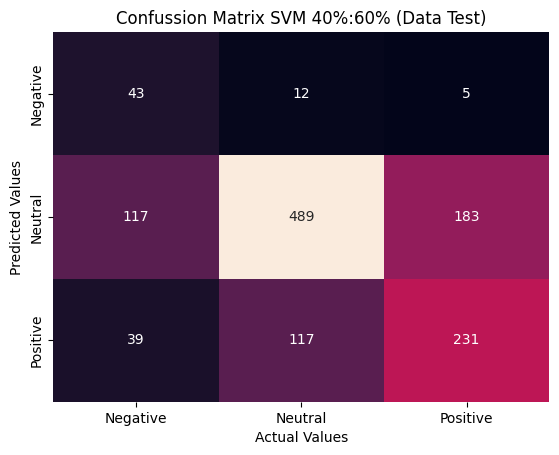

In [41]:
#Visualisasi dari Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False, xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confussion Matrix SVM 40%:60% (Data Test)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Keterangan:

In [42]:
#melihat banyak label confusion matrix
confusion_hasil = df_svm2['Confusion Matrix'].value_counts()
print("Confusion Matrix 3 Kelas:")
print(confusion_hasil)
print()

#melihat prediksi
count_hasil = df_svm2["Hasil"].value_counts()

benar = count_hasil["Benar"] if "Benar" in count_hasil.index else 0
salah = count_hasil["Salah"] if "Salah" in count_hasil.index else 0
print("Prediksi yang benar:", benar, "data")
print("Prediksi yang salah:", salah, "data")
print()

#melihat akurasi, presisi, dan recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#akurasi
acc = accuracy_score(y_test, y_pred_svm)
#tampilkan akurasi
print(f"Akurasi: {acc * 100:.2f}%")
print()

#presisi
average_precision = precision_score(y_test, y_pred_svm, average='weighted')
print(f"Presisi: {average_precision * 100:.2f}%")
print()

#recall
average_recall = recall_score(y_test, y_pred_svm, average='weighted')
print(f"Recall: {average_recall * 100:.2f}%")
print()

#f1-score
f1 = f1_score(y_test, y_pred_svm, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

Confusion Matrix 3 Kelas:
Confusion Matrix
True Netral (TNR)                                                489
True Positive (TP)                                               231
False Netral (FNR) untuk aktual Positif tapi prediksi Netral     183
False Positif (FP) untuk aktual Netral tapi prediksi Positif     117
False Netral (FNR) untuk aktual Negatif tapi prediksi Netral     117
True Negative (TN)                                                43
False Positif (FP) untuk aktual Negatif tapi prediksi Positif     39
False Negatif (FN) untuk aktual Netral tapi prediksi Negatif      12
False Negatif (FN) untuk aktual Positif tapi prediksi Negatif      5
Name: count, dtype: int64

Prediksi yang benar: 763 data
Prediksi yang salah: 473 data

Akurasi: 61.73%

Presisi: 62.76%

Recall: 61.73%

F1 Score: 59.53%


**Link condition confusion matrix :** https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/

**TF-IDF** :https://yunusmuhammad007.medium.com/tf-idf-term-frequency-inverse-document-frequency-representasi-vector-data-text-2a4eff56cda